In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1. 准备 CIFAR-10 数据

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

### 2. 查看 CIFAR-10 数据

In [4]:
print('x_train data:', len(x_train))
print('x_test data:', len(x_test))

x_train data: 50000
x_test data: 10000


In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

### 3. 定义 plot_images_labels_prediction 函数以查看图像

In [7]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [8]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 图像数组
    labels: 真实值数组, 其实每个元素的数字代表一种图像类别的名称
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = str(labels[idx][0]) + ',' + label_dict[labels[idx][0]]
        if len(predictions) > 0:
            title += '=>' + label_dict[predictions[idx]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

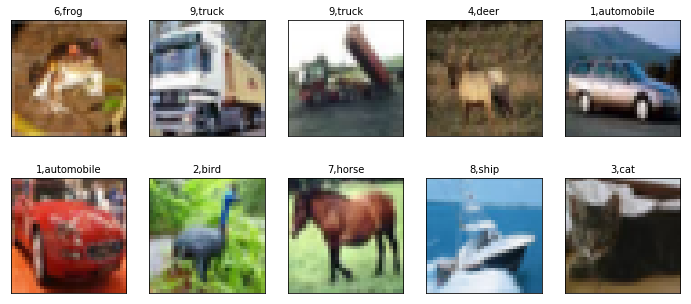

In [9]:
plot_images_labels_prediction(x_train, y_train, [], 0, 10)

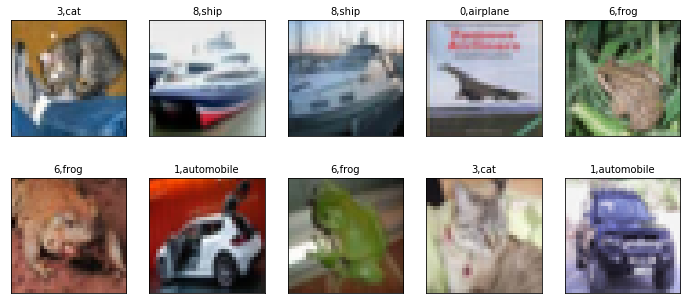

In [10]:
plot_images_labels_prediction(x_test, y_test, [], 0, 10)

### 4. features 数据预处理

#### 4.1 查看训练数据第1个图像的第1 个点

In [11]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

#### 4.2 将 images 中的数字标准化

In [12]:
x_train_normalize = x_train / 255.0
x_test_normalize = x_test / 255.0

#### 4.3 查看 images 的数字标准化后的结果

In [13]:
x_train_normalize[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

### 5.  label 数据预处理

#### 5.1 查看 label 原来的 shape

In [14]:
y_train.shape

(50000, 1)

#### 5.2 查看训练 label 的前5项数据

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### 5.3 将 label 标签字段进行 one-hot 编码转换

In [16]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

#### 5.4 查看进行 one-hot 编码转换之后的 label 标签字段

In [17]:
y_train_one_hot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)